In [1]:
import uproot as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from df_utils import *

In [2]:
run = "run3"
dm_type = "fermion"
mass = "0.05"
target_pot = 1.
signal_pot = {}

bkg_upper_limit = 1.14 


if(dm_type == "fermion"):
    signal_pot = { "0.01":4.49230189e+20, "0.02":3.24986846e+21, "0.03":1.44413783e+22, 
                  "0.04":5.51306150e+22, "0.05":1.74805153e+23, "0.06":5.79056950e+23,
                  "0.07":1.48783150e+24, "0.08":4.41322940e+24, 
                  "0.09":9.92424735e+24, "0.10":2.27414738e+25}

else: 
    signal_pot = { "0.01":8.70545727e+21, "0.02": 9.48797710e+22, "0.03":4.86277630e+23, 
                  "0.04":1.94231827e+24, "0.05":8.19564834e+24, "0.06":2.06542023e+25,
                  "0.07":5.83217654e+25, "0.08":1.54999742e+26, 
                  "0.09":2.94329651e+26, "0.10":5.04481005e+26}


scalings_run1 = { "nu":1./2.34e21, "dirt":0.75/1.6e21, "beamoff": 1.56*0.98}
scalings_run3 = { "nu":1./1.993661e21, "dirt":0.35/1.020e21, "beamoff": 2.909}

scalings = {}

if(run == "run1"):
    target_pot = 2.0e20
    scalings = scalings_run1
    pot_label = r'                    $2\times10^{20}$ POT'
else:
    target_pot = 5.0e20
    scalings = scalings_run3
    pot_label = r'                    $5\times10^{20}$ POT'

signal_scaling = target_pot/signal_pot[mass]
nu_scaling = target_pot*scalings["nu"]
dirt_scaling = target_pot*scalings["dirt"]
offbeam_scaling = scalings["beamoff"]

In [3]:
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/" + run + "_samples/" 
plots_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/"

df_signal = pd.read_csv(base_dir + "df_trident_" + run + "_" + mass + "_score_test.csv")
df_nu = pd.read_csv(base_dir + run + "_nu_overlay_bdt_score.csv")
df_dirt = pd.read_csv(base_dir + run + "_dirt_bdt_score.csv")
df_beamoff = pd.read_csv(base_dir + run + "_offbeam_score.csv")


MC_weight_branch(df_nu)
MC_weight_branch(df_dirt)

In [4]:
df_nu.head()

,run_number,subrun_number,event_number,ppfx_cv,weightSplineTimesTune,sss_candidate_min_dist,reco_shower_energy_max,reco_shower_nuscore,reco_shower_trackscore,reco_shower_theta_yz,reco_shower_phi_yx,reco_shower_opening_angle,cos_theta,bdt_score,weight
0,14938.0,218.0,10933.0,0.911,1.000,54.693,129.882,0.012,0.435,-2.178,-1.479,0.085,-0.645,0.008,0.911000
1,17164.0,115.0,5780.0,0.657,1.000,60.671,523.398,0.047,0.013,-0.001,-0.001,0.207,0.912,0.973,0.657000
2,17164.0,120.0,6007.0,0.548,1.107,68.950,1500.471,0.175,0.004,0.141,0.409,0.177,0.972,0.204,0.606636
3,17267.0,53.0,2688.0,1.031,1.000,6.259,128.632,0.086,0.129,-2.144,-2.235,0.246,-0.567,0.010,1.031000
4,17415.0,288.0,14403.0,1.029,1.040,0.431,93.566,0.005,0.144,1.419,1.498,0.172,0.260,0.004,1.070160


In [5]:
def logit_transform(score):
    return np.log(score/(1-score))

def filter_df(df):
    df = df[df['bdt_score'] >= 0.5]
    return df


def GetStatsUncert(df_a, weight_array,my_custom_bins,plot_var):
    (counts_df, bins_df) = np.histogram(df_a[plot_var], bins = my_custom_bins, weights=np.square(weight_array))
    return counts_df

Showing results for: run3
Number of neutrinos: 1534.797592970915
Number of dirt: 289.1183859803924
Number of beam-off: 5143.112


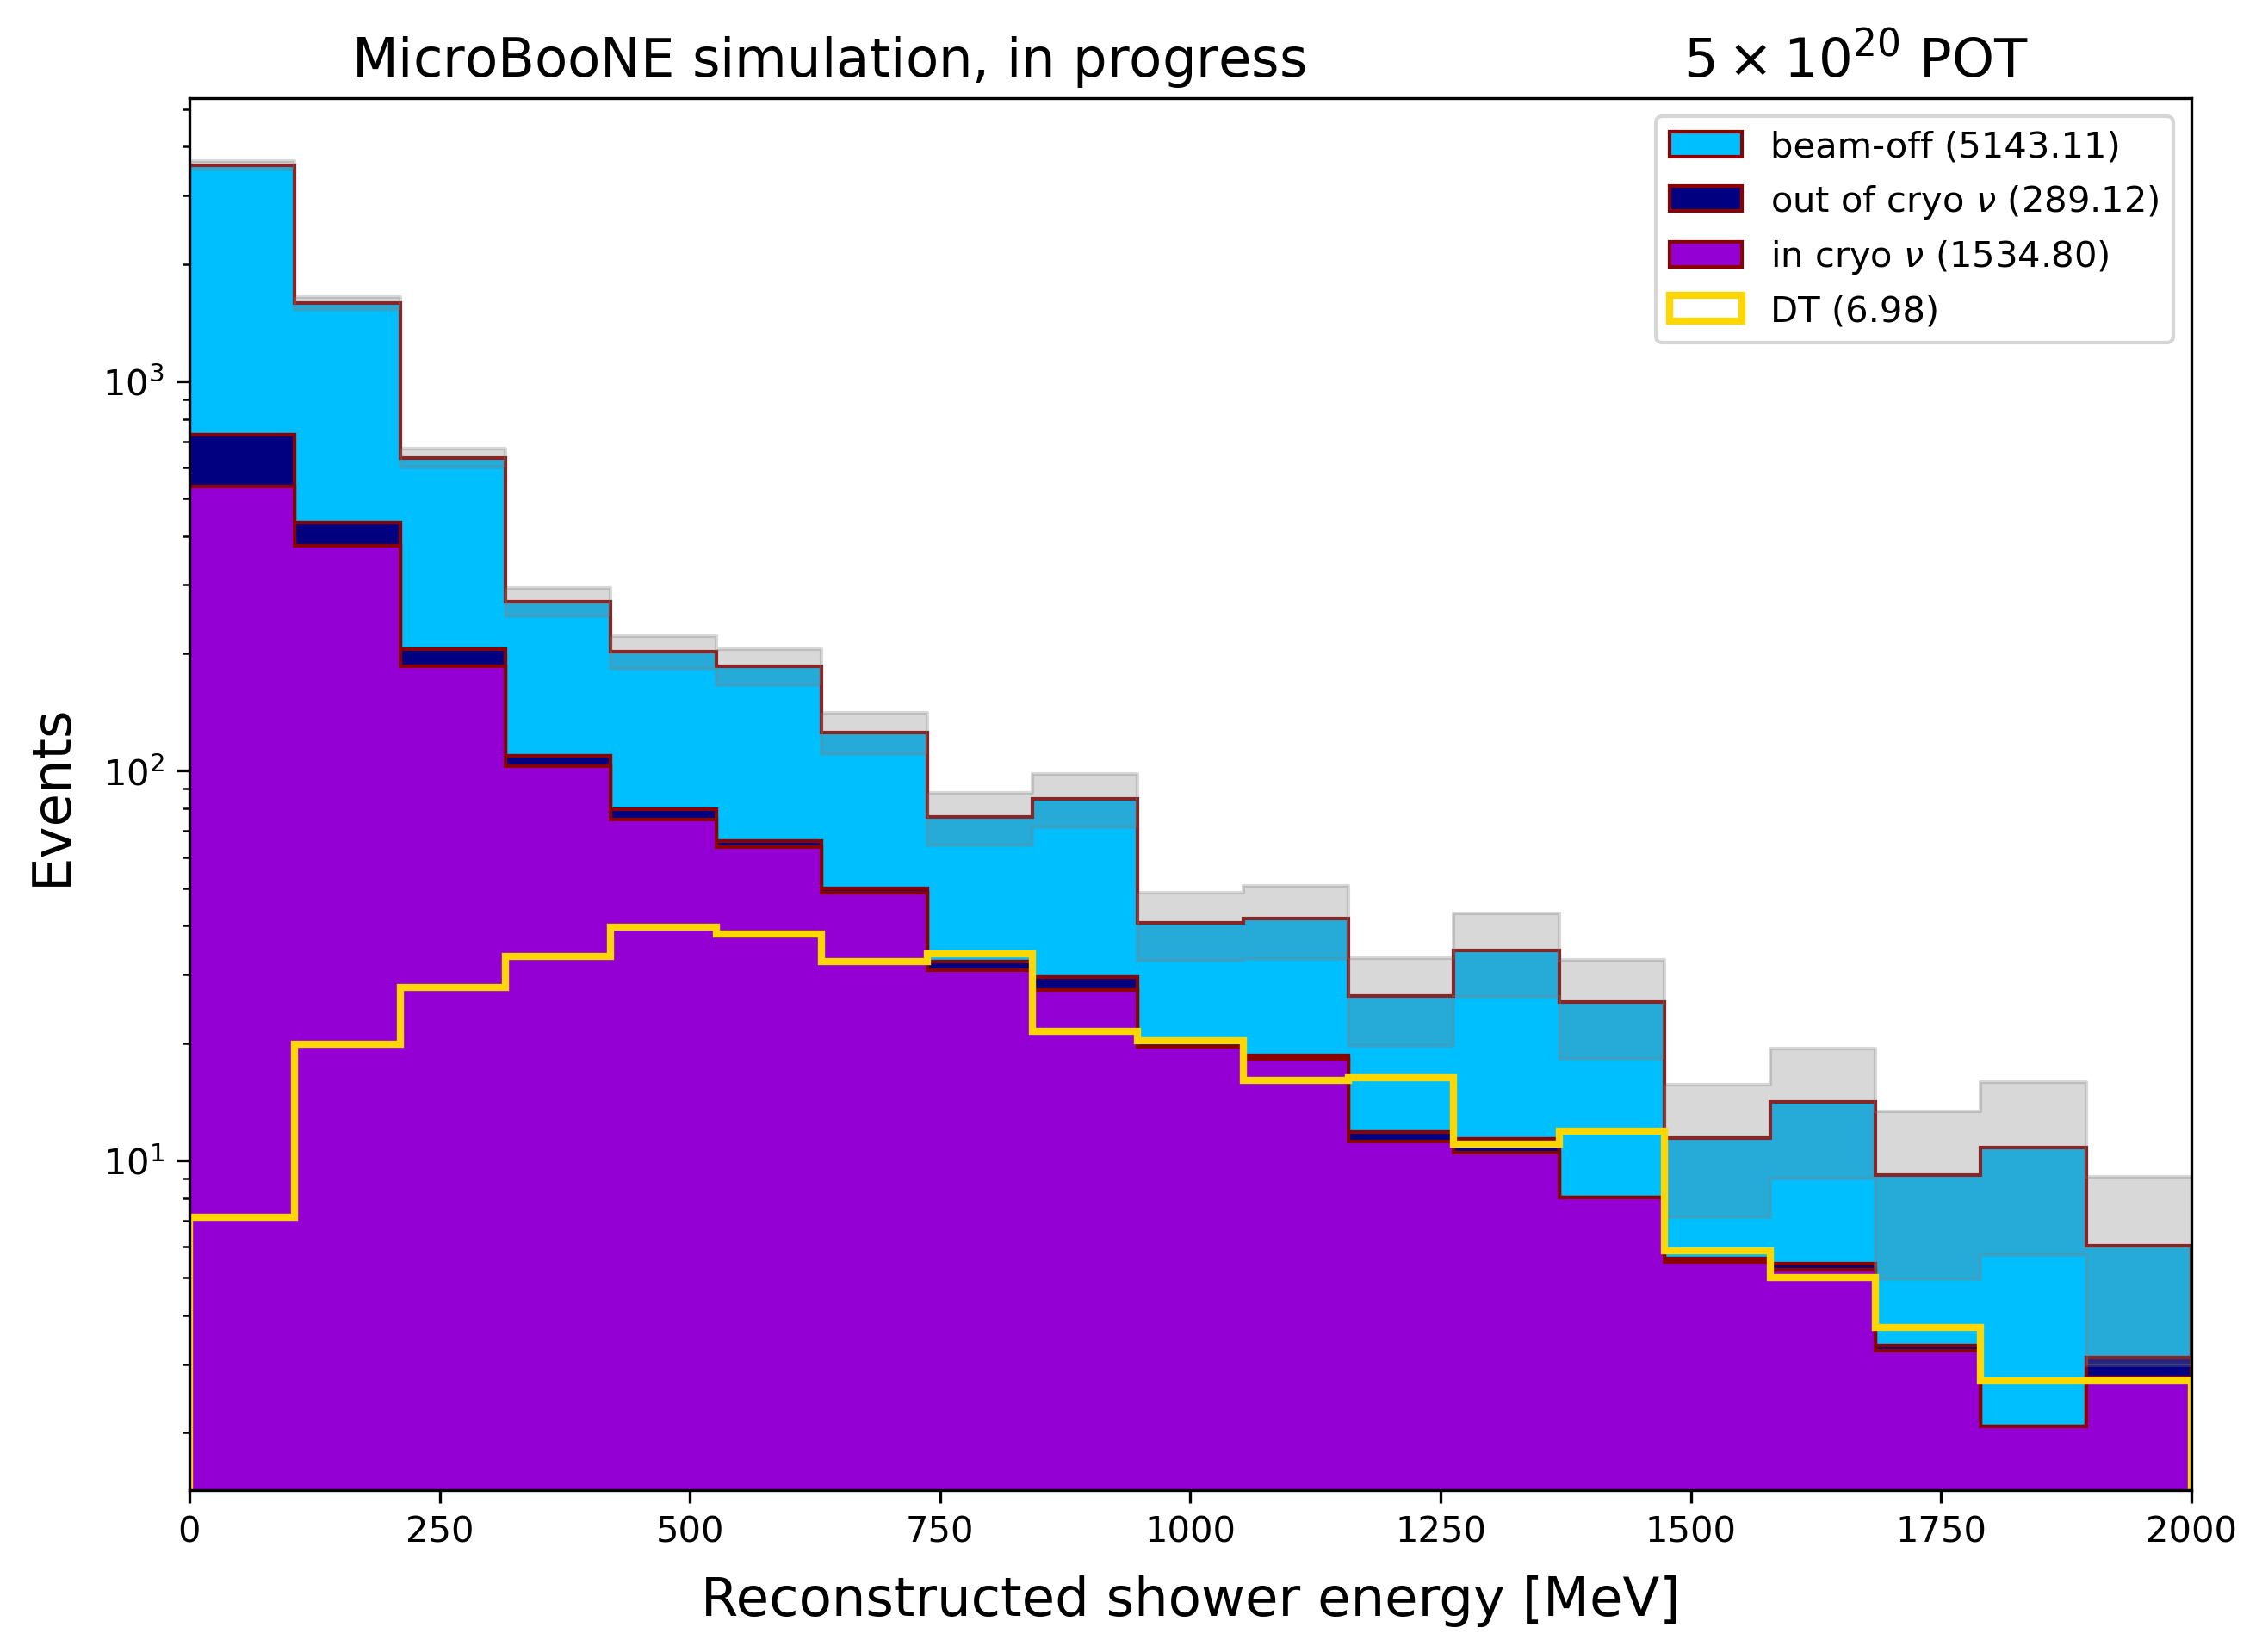

In [6]:
up_plot = 2000.
down_plot = 0.
my_custom_bins = np.linspace(down_plot,up_plot,20)
variable = 'reco_shower_energy_max'

'''
variable_aux = 'reco_vertex_size'

df_nu = df_nu[df_nu[variable_aux] > 0.]
df_dirt = df_dirt[df_dirt[variable_aux] > 0.]
df_beamoff = df_beamoff[df_beamoff[variable_aux] > 0.]
df_beamon = df_beamon[df_beamon[variable_aux] > 0.]
'''

(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
#(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


print("Showing results for: " + run)
#print("Number of dark tridents M_A="+str(mass)+" :" + str(np.sum(counts_signal)*signal_scaling))
print("Number of neutrinos: " + str(np.sum(counts_nu)*nu_scaling))
print("Number of dirt: " + str(np.sum(counts_dirt)*dirt_scaling))
print("Number of beam-off: " + str(np.sum(counts_beamoff)*offbeam_scaling))
#print("Number of beam-on: " + str(np.sum(counts_beamon)))

dt_legend = r'DT ({:.2f})'.format(np.sum(counts_signal)*signal_scaling)
nu_legend = r'in cryo $\nu$ ({:.2f})'.format(np.sum(counts_nu)*nu_scaling)
dirt_legend = r'out of cryo $\nu$ ({:.2f})'.format(np.sum(counts_dirt)*dirt_scaling)
beamoff_legend = r'beam-off ({:.2f})'.format(np.sum(counts_beamoff)*offbeam_scaling)
#beamon_legend = r'beam-on ({:.2f})'.format(np.sum(counts_beamon))

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + stats_total
stats_down = counts_bkg - stats_total



# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])



fig, ax = plt.subplots(1,1,figsize=(10,7),dpi=300)
#ax.set_title(r'MicroBooNE NuMI data' + ' ' + run + ', ' + dm_type + ' DM' + pot_label ,fontsize=15)
ax.set_title(r'MicroBooNE simulation, in progress  '  + pot_label ,fontsize=15)
ax.hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax.fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.3,step='post')
ax.hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*50, histtype='step',label=dt_legend ,fill=False, edgecolor='gold', linewidth='2.')
ax.legend(fontsize=10)
ax.tick_params(axis='y', which='major', labelsize=10)
#ax.tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False)
ax.set_xlabel(r'Reconstructed shower energy [MeV]',fontsize=15,labelpad=7)
ax.set_xlim(down_plot,up_plot)
ax.set_ylabel("Events",fontsize=15, labelpad=7) 
ax.set_yscale('log')


plt.savefig(plots_dir + "BDT_preselection_" + run + "_" + variable + "_.png")
plt.show()

Showing results for: run3
Number of neutrinos: 1235.5193317720464
Number of dirt: 209.1285476960785
Number of beam-off: 3578.0699999999997


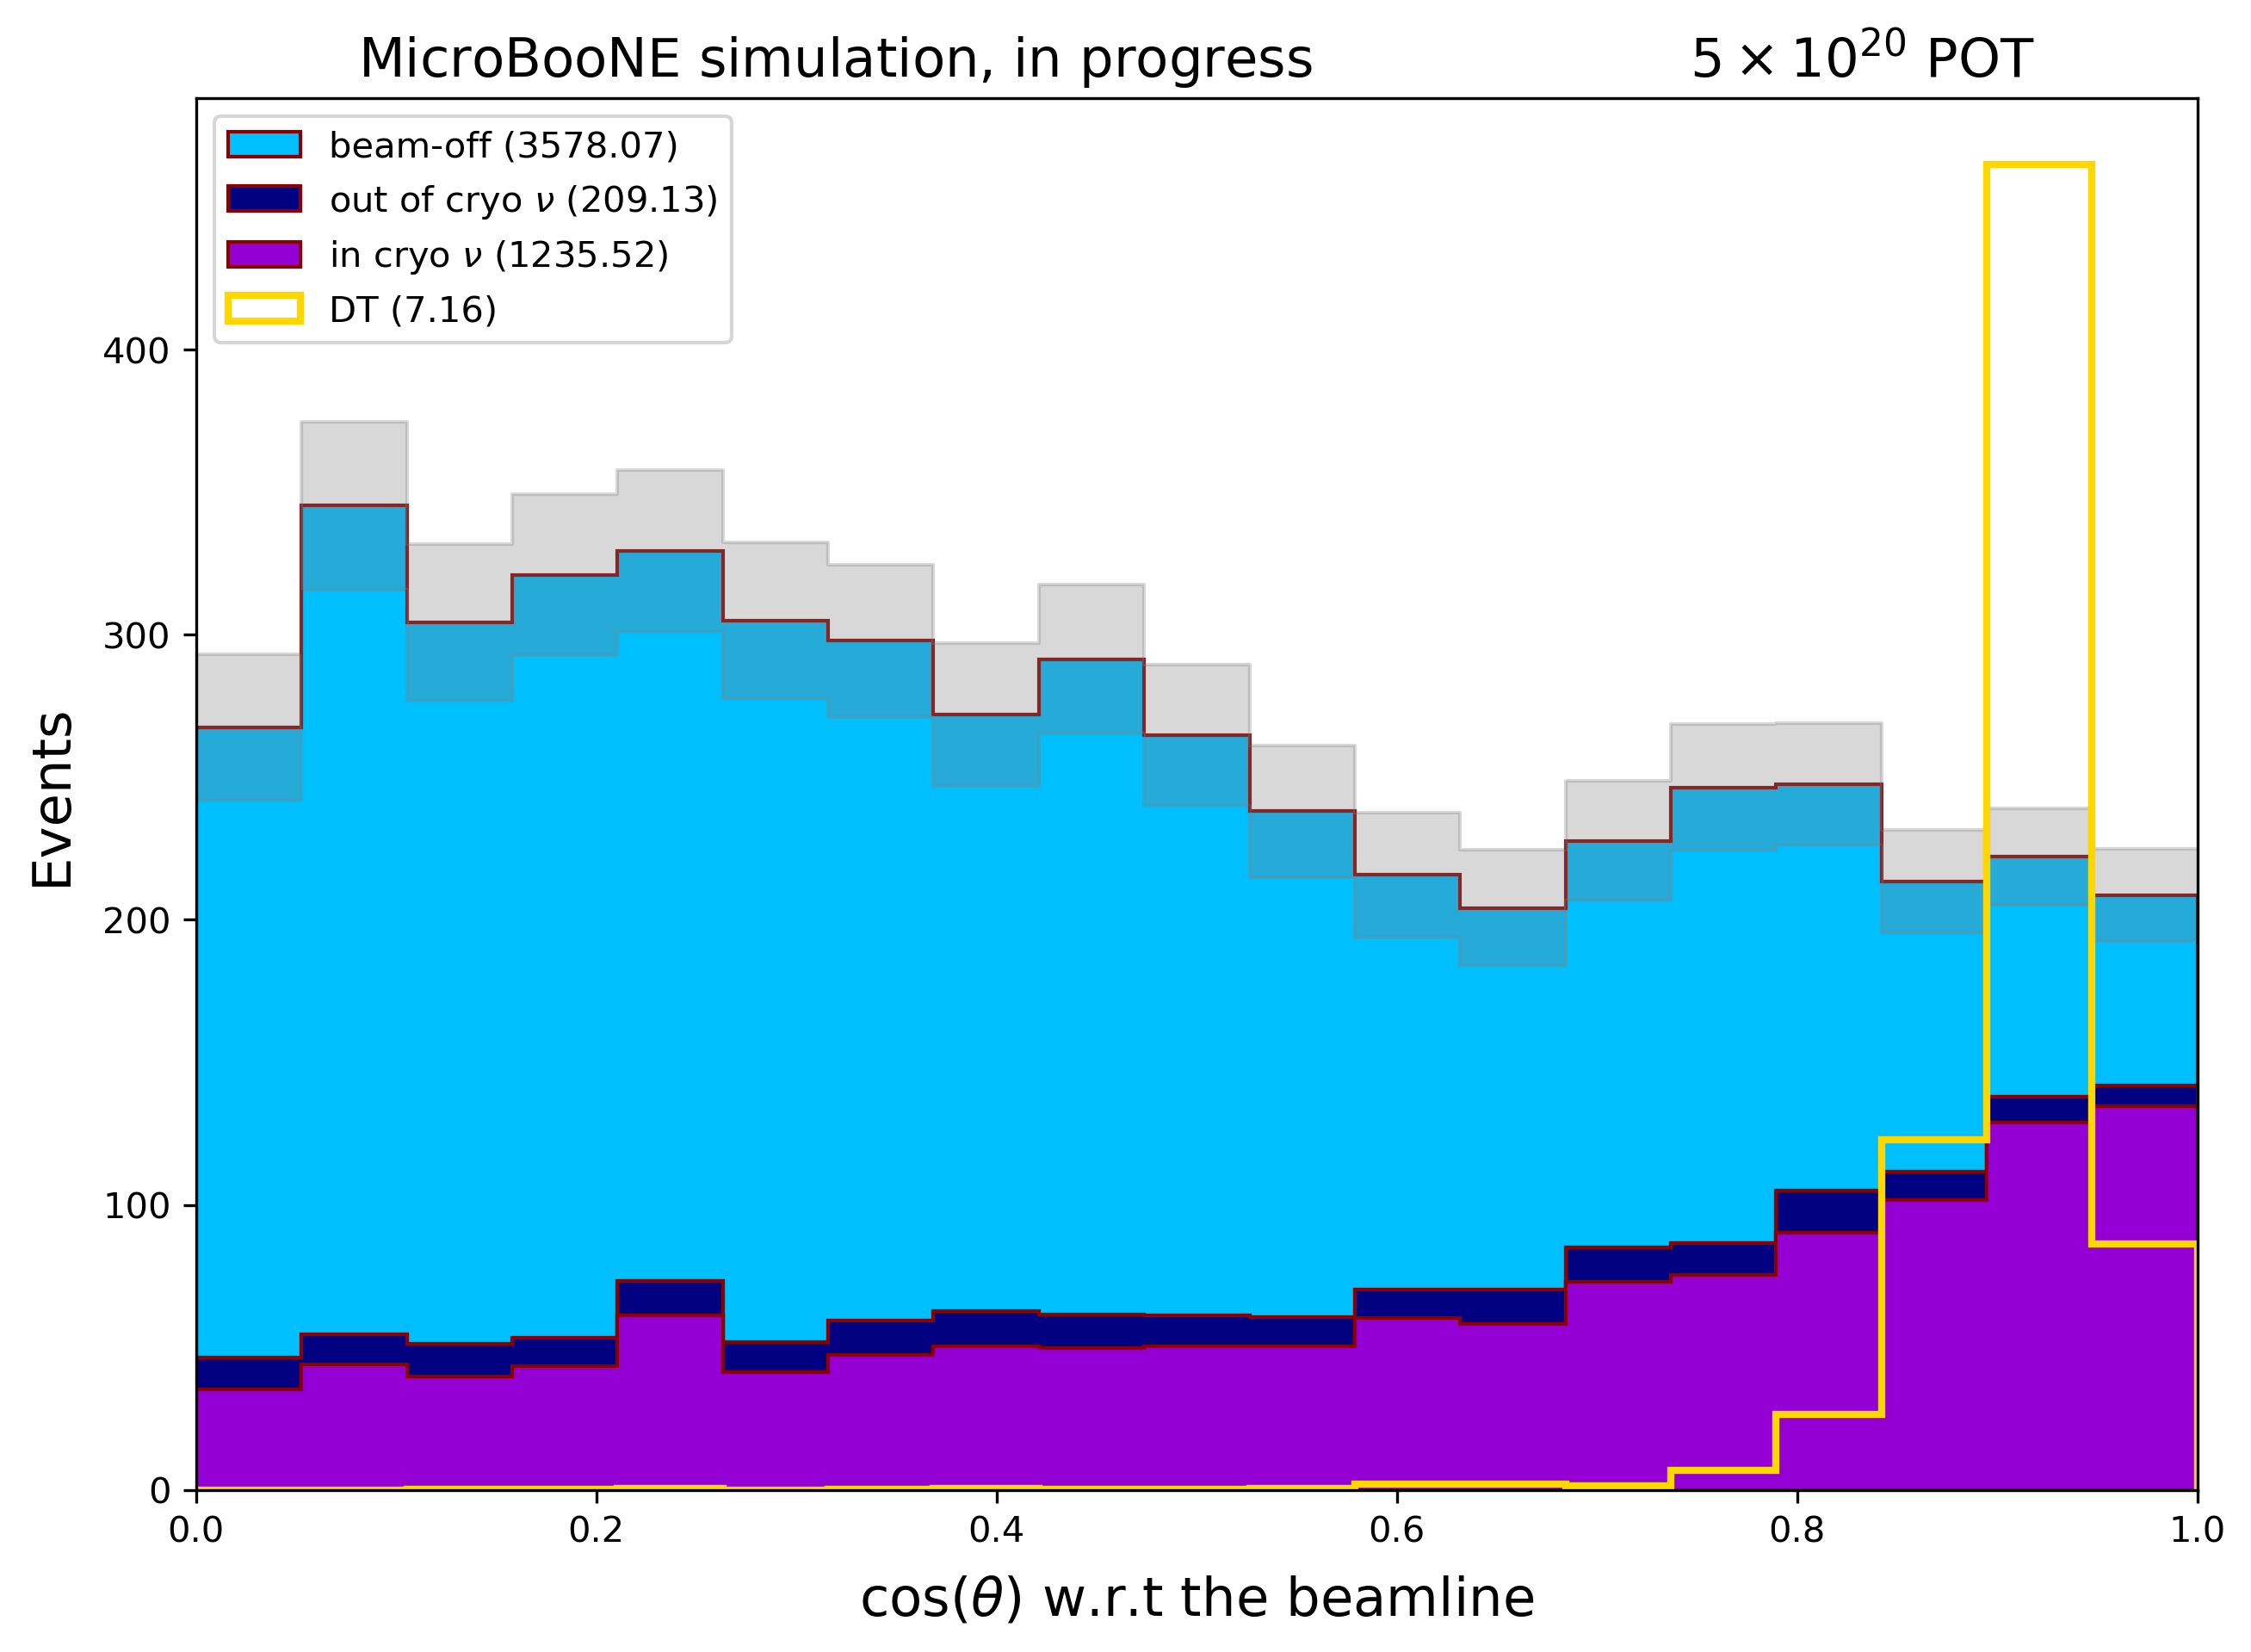

In [7]:
up_plot = 1.0
down_plot = 0.
my_custom_bins = np.linspace(down_plot,up_plot,20)
variable = 'cos_theta'


(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
#(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


print("Showing results for: " + run)
#print("Number of dark tridents M_A="+str(mass)+" :" + str(np.sum(counts_signal)*signal_scaling))
print("Number of neutrinos: " + str(np.sum(counts_nu)*nu_scaling))
print("Number of dirt: " + str(np.sum(counts_dirt)*dirt_scaling))
print("Number of beam-off: " + str(np.sum(counts_beamoff)*offbeam_scaling))
#print("Number of beam-on: " + str(np.sum(counts_beamon)))

dt_legend = r'DT ({:.2f})'.format(np.sum(counts_signal)*signal_scaling)
nu_legend = r'in cryo $\nu$ ({:.2f})'.format(np.sum(counts_nu)*nu_scaling)
dirt_legend = r'out of cryo $\nu$ ({:.2f})'.format(np.sum(counts_dirt)*dirt_scaling)
beamoff_legend = r'beam-off ({:.2f})'.format(np.sum(counts_beamoff)*offbeam_scaling)
#beamon_legend = r'beam-on ({:.2f})'.format(np.sum(counts_beamon))

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + stats_total
stats_down = counts_bkg - stats_total



# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])



fig, ax = plt.subplots(1,1,figsize=(10,7),dpi=300)
#ax.set_title(r'MicroBooNE NuMI data' + ' ' + run + ', ' + dm_type + ' DM' + pot_label ,fontsize=15)
ax.set_title(r'MicroBooNE simulation, in progress  '  + pot_label ,fontsize=15)
ax.hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax.fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.3,step='post')
ax.hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*100, histtype='step',label=dt_legend ,fill=False, edgecolor='gold', linewidth='2.')
ax.legend(fontsize=10,loc='upper left')
ax.tick_params(axis='y', which='major', labelsize=10)
#ax.tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False)
ax.set_xlabel(r'cos($\theta$) w.r.t the beamline',fontsize=15,labelpad=7)
ax.set_xlim(down_plot,up_plot)
ax.set_ylabel("Events",fontsize=15, labelpad=7) 

plt.savefig(plots_dir + "BDT_preselection_" + run + "_" + variable + "_.png")
plt.show()

Showing results for: run3
Number of neutrinos: 1508.2971495655459
Number of dirt: 286.3370579656864
Number of beam-off: 5163.474999999999


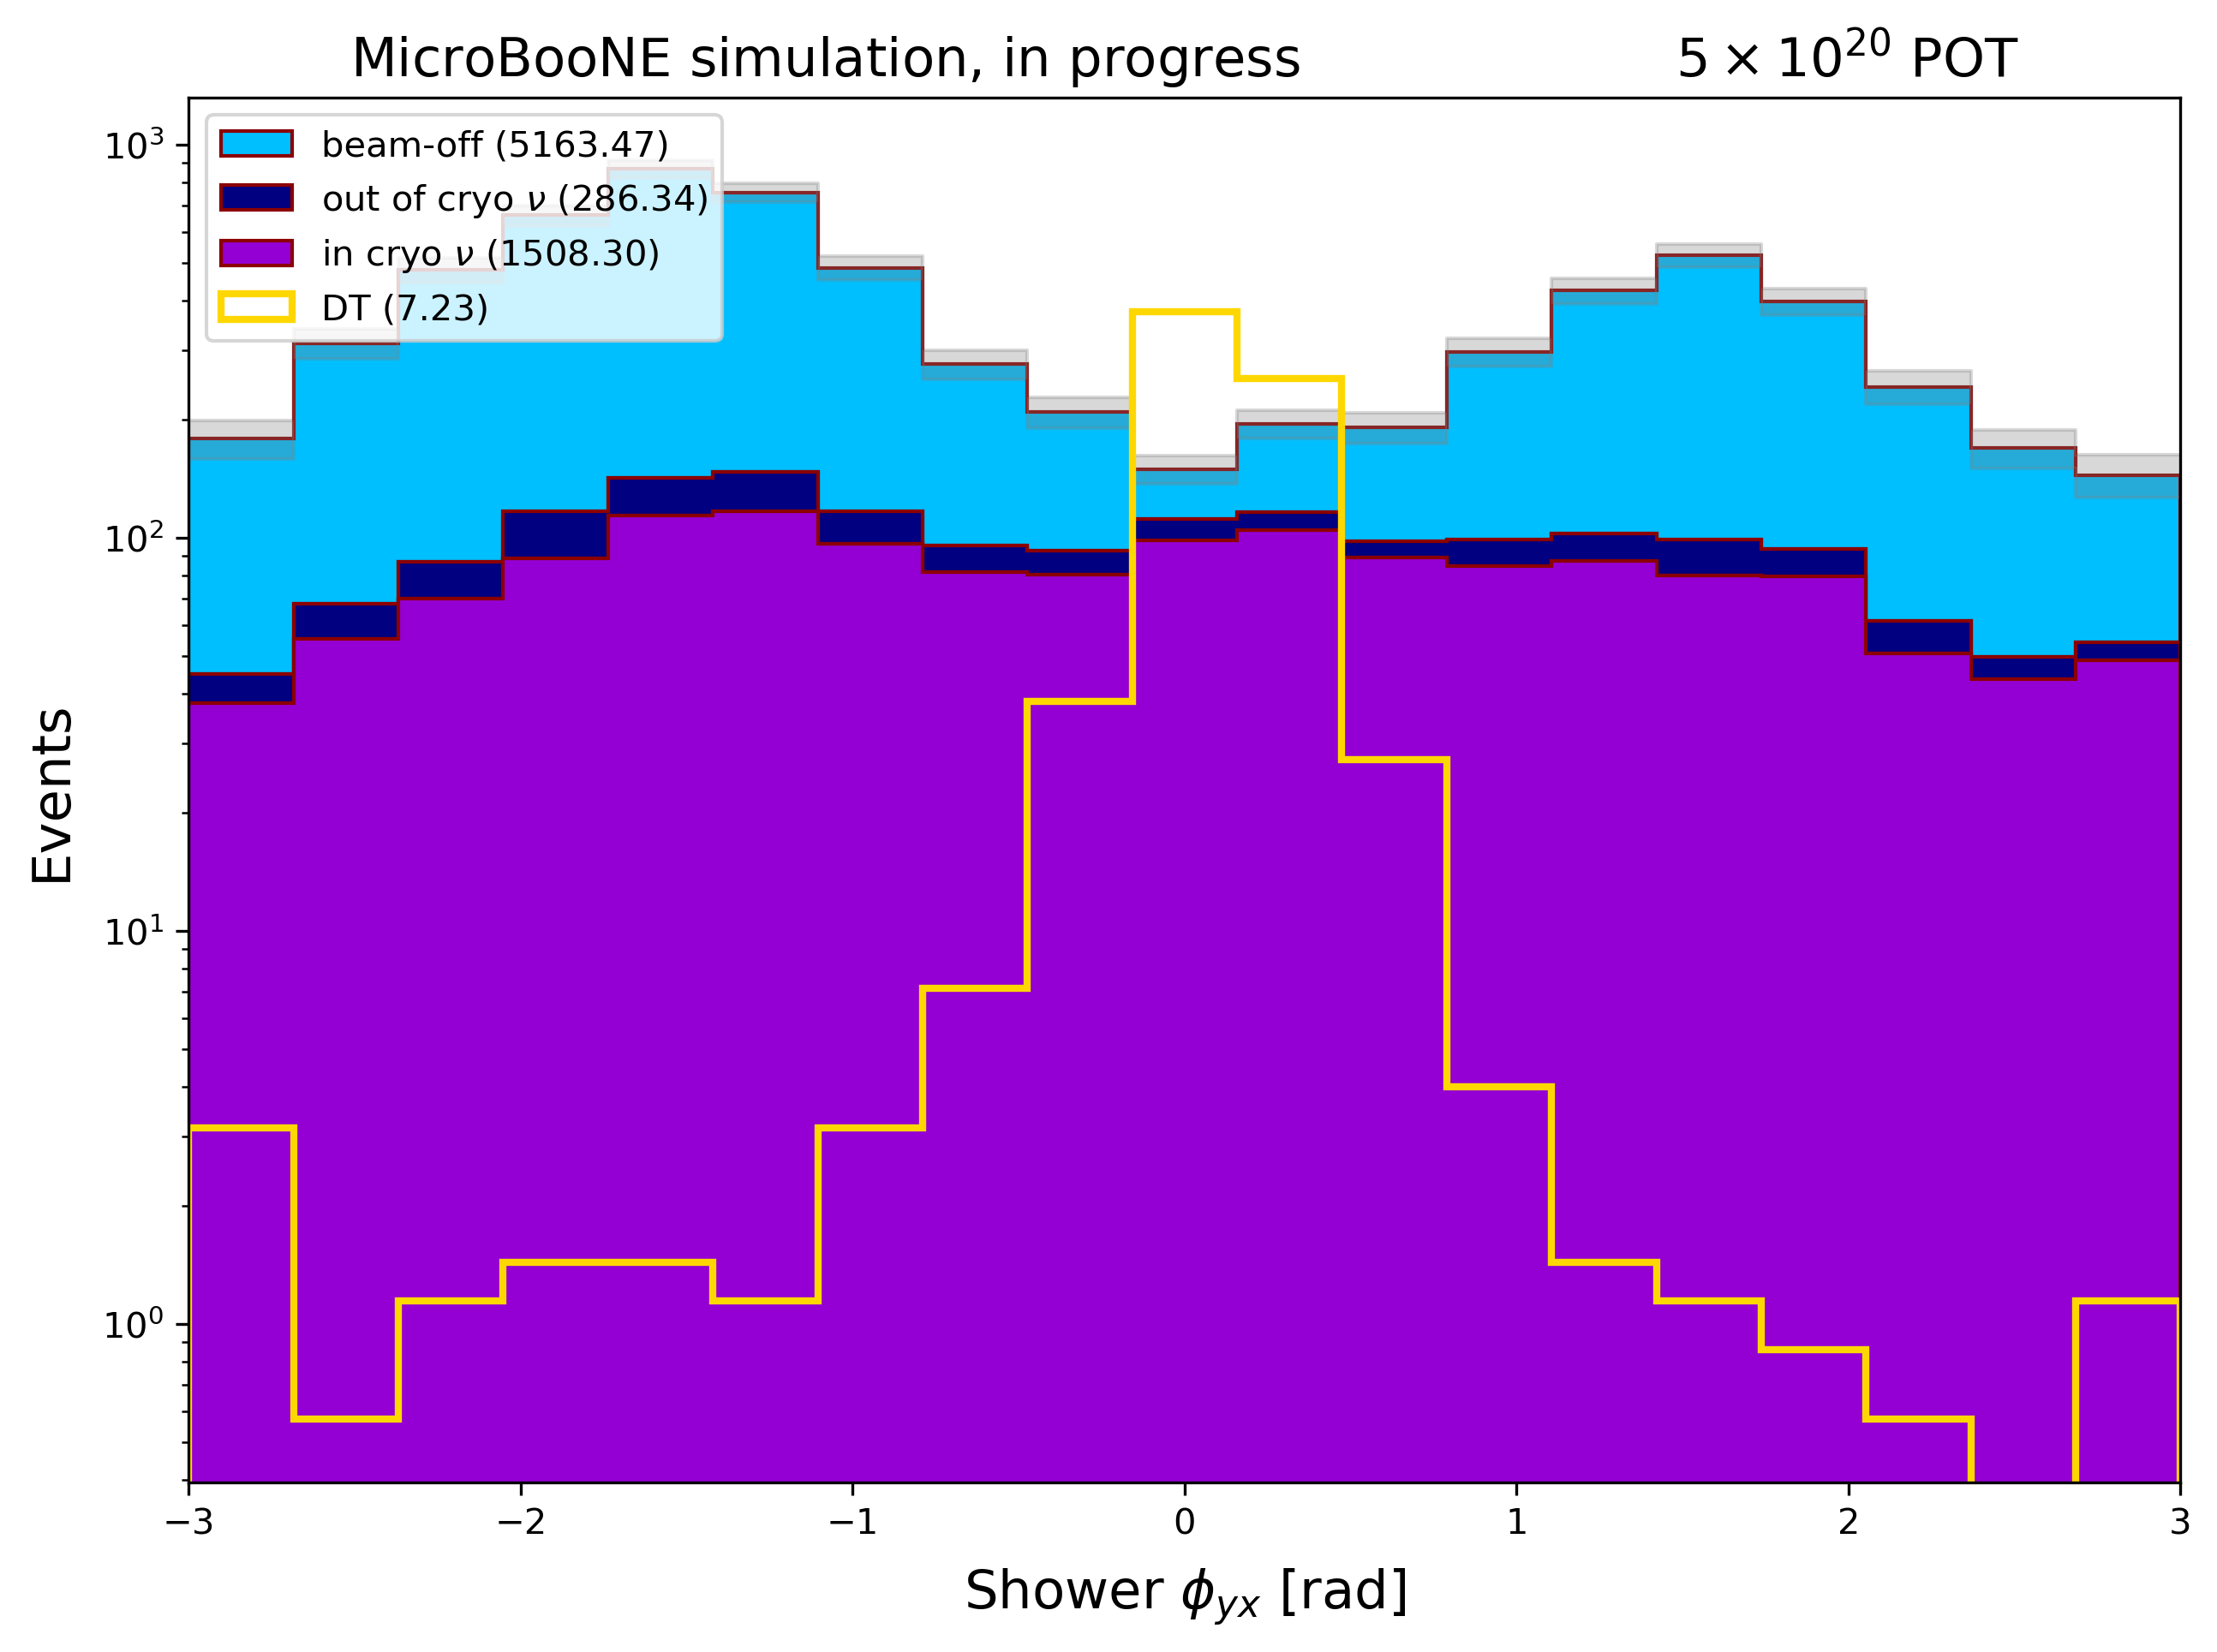

In [8]:
up_plot = 3.
down_plot = -3.
my_custom_bins = np.linspace(down_plot,up_plot,20)
variable = 'reco_shower_phi_yx'


(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
#(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


print("Showing results for: " + run)
#print("Number of dark tridents M_A="+str(mass)+" :" + str(np.sum(counts_signal)*signal_scaling))
print("Number of neutrinos: " + str(np.sum(counts_nu)*nu_scaling))
print("Number of dirt: " + str(np.sum(counts_dirt)*dirt_scaling))
print("Number of beam-off: " + str(np.sum(counts_beamoff)*offbeam_scaling))
#print("Number of beam-on: " + str(np.sum(counts_beamon)))

dt_legend = r'DT ({:.2f})'.format(np.sum(counts_signal)*signal_scaling)
nu_legend = r'in cryo $\nu$ ({:.2f})'.format(np.sum(counts_nu)*nu_scaling)
dirt_legend = r'out of cryo $\nu$ ({:.2f})'.format(np.sum(counts_dirt)*dirt_scaling)
beamoff_legend = r'beam-off ({:.2f})'.format(np.sum(counts_beamoff)*offbeam_scaling)
#beamon_legend = r'beam-on ({:.2f})'.format(np.sum(counts_beamon))

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + stats_total
stats_down = counts_bkg - stats_total



# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])



fig, ax = plt.subplots(1,1,figsize=(10,7),dpi=300)
#ax.set_title(r'MicroBooNE NuMI data' + ' ' + run + ', ' + dm_type + ' DM' + pot_label ,fontsize=15)
ax.set_title(r'MicroBooNE simulation, in progress  '  + pot_label ,fontsize=15)
ax.hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax.fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.3,step='post')
ax.hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*100, histtype='step',label=dt_legend ,fill=False, edgecolor='gold', linewidth='2.')
ax.legend(fontsize=10,loc='upper left')
ax.tick_params(axis='y', which='major', labelsize=10)
#ax.tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False)
ax.set_xlabel(r'Shower $\phi_{yx}$ [rad]',fontsize=15,labelpad=7)
ax.set_xlim(down_plot,up_plot)
ax.set_ylabel("Events",fontsize=15, labelpad=7) 
ax.set_yscale('log')
plt.savefig(plots_dir + "BDT_preselection_" + run + "_" + variable + "_.png")
plt.show()

Maximum of signal score: 5.109977737428518
Binning:  [0.0, 0.5677753041587242, 1.1355506083174485, 1.7033259124761728, 2.271101216634897, 2.838876520793621, 3.4066518249523456, 5.109977737428518]
Showing results for: run3
Number of neutrinos: 111.54716799897278
Number of dirt: 9.477304803921571
Number of beam-off: 23.272


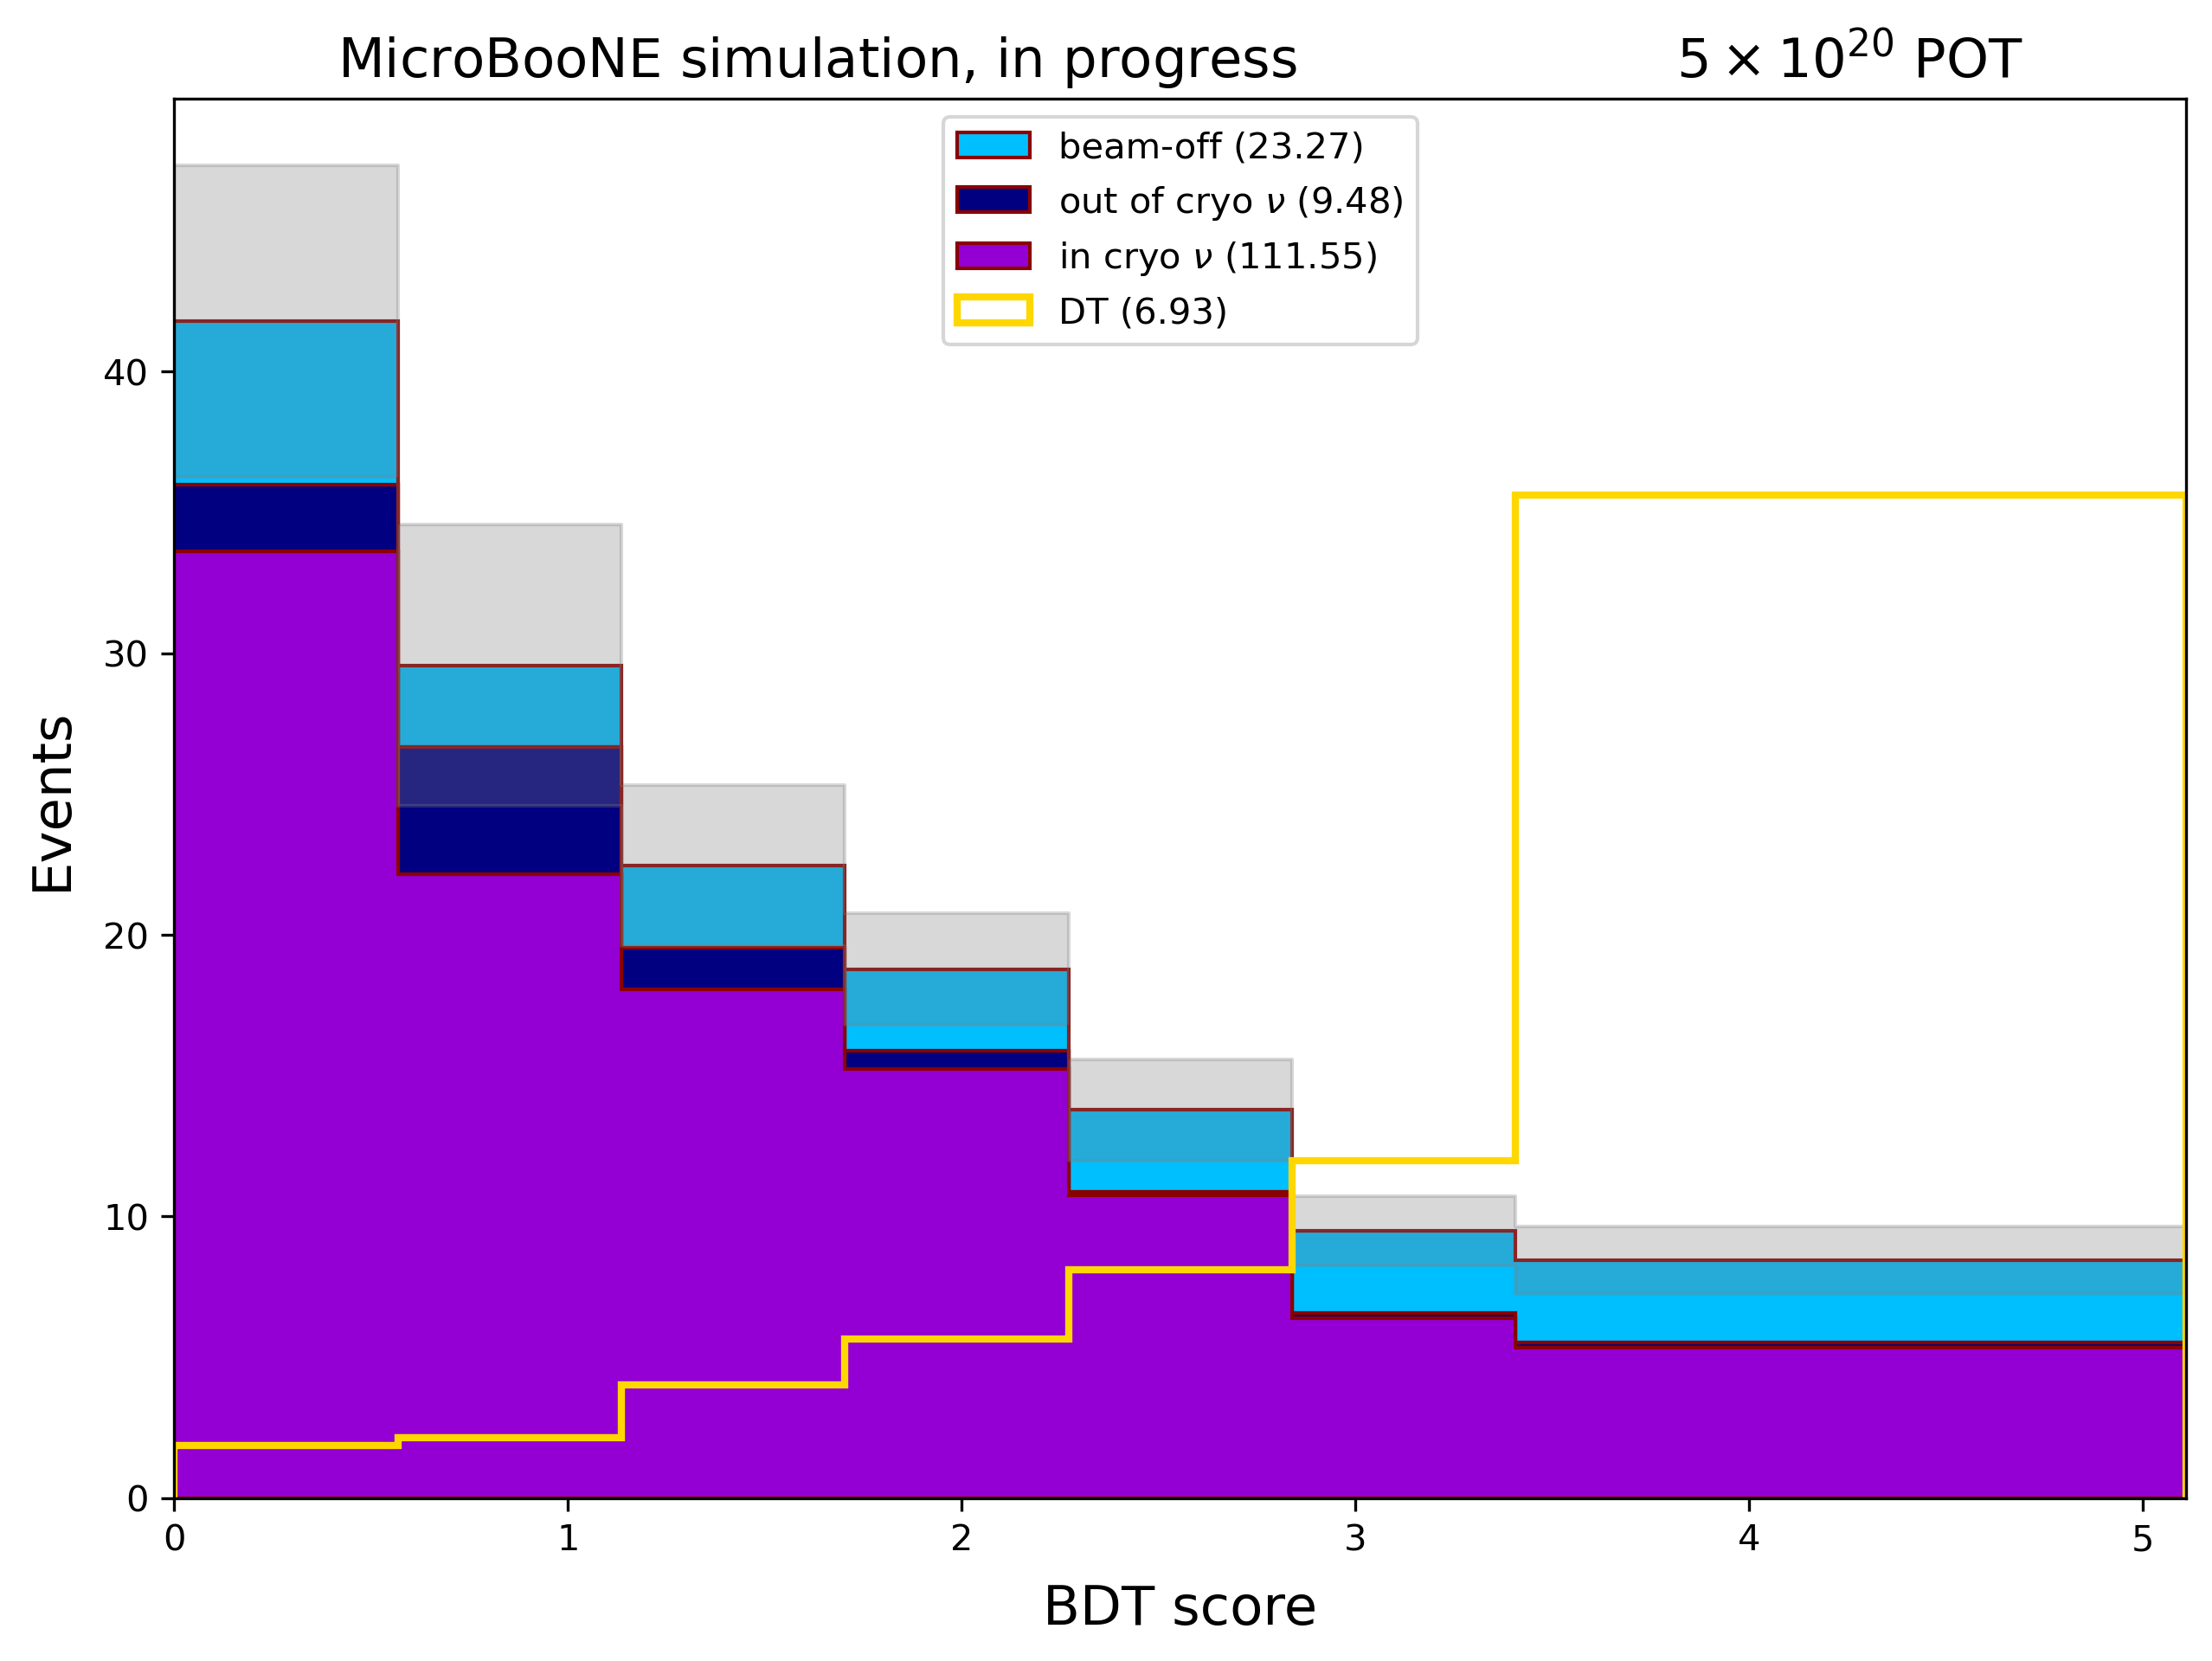

In [9]:
variable = 'bdt_score'
df_signal = filter_df(df_signal)
df_nu = filter_df(df_nu)
df_dirt = filter_df(df_dirt)
df_beamoff = filter_df(df_beamoff)


df_signal['bdt_score'] = logit_transform(df_signal['bdt_score'])
df_nu['bdt_score'] = logit_transform(df_nu['bdt_score'])
df_dirt['bdt_score'] = logit_transform(df_dirt['bdt_score'])
df_beamoff['bdt_score'] = logit_transform(df_beamoff['bdt_score'])


print("Maximum of signal score:", np.max(df_signal['bdt_score']))

n_bins = 9
binning = np.linspace(0., np.max(df_signal['bdt_score']) ,n_bins+1)
my_custom_bins = np.delete(binning, [len(binning) - 3, len(binning) - 2])
print("Binning: ", my_custom_bins.tolist())
up_plot = my_custom_bins[-1]
down_plot = 0.



(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
#(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)

counts_dirt[counts_dirt == 0.] = bkg_upper_limit
counts_beamoff[counts_beamoff == 0.] = bkg_upper_limit

print("Showing results for: " + run)
#print("Number of dark tridents M_A="+str(mass)+" :" + str(np.sum(counts_signal)*signal_scaling))
print("Number of neutrinos: " + str(np.sum(counts_nu)*nu_scaling))
print("Number of dirt: " + str(np.sum(counts_dirt)*dirt_scaling))
print("Number of beam-off: " + str(np.sum(counts_beamoff)*offbeam_scaling))
#print("Number of beam-on: " + str(np.sum(counts_beamon)))

dt_legend = r'DT ({:.2f})'.format(np.sum(counts_signal)*signal_scaling)
nu_legend = r'in cryo $\nu$ ({:.2f})'.format(np.sum(counts_nu)*nu_scaling)
dirt_legend = r'out of cryo $\nu$ ({:.2f})'.format(np.sum(counts_dirt)*dirt_scaling)
beamoff_legend = r'beam-off ({:.2f})'.format(np.sum(counts_beamoff)*offbeam_scaling)
#beamon_legend = r'beam-on ({:.2f})'.format(np.sum(counts_beamon))

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + stats_total
stats_down = counts_bkg - stats_total



# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])



fig, ax = plt.subplots(1,1,figsize=(10,7),dpi=300)
#ax.set_title(r'MicroBooNE NuMI data' + ' ' + run + ', ' + dm_type + ' DM' + pot_label ,fontsize=15)
ax.set_title(r'MicroBooNE simulation, in progress  '  + pot_label ,fontsize=15)
ax.hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax.fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.3,step='post')
ax.hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*10, histtype='step',label=dt_legend ,fill=False, edgecolor='gold', linewidth='2.')
ax.legend(fontsize=10,loc='upper center')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel(r'BDT score',fontsize=15,labelpad=7)
ax.set_xlim(down_plot,up_plot)
ax.set_ylabel("Events",fontsize=15, labelpad=7) 
plt.savefig(plots_dir + "BDT_preselection_" + run + "_" + variable + "_.png")
plt.show()